In [1]:
# Data Collection and Preprocessing Notebook
import sys
sys.path.append('../src')


In [2]:

from data_collection import PlayStoreScraper as ReviewScraper
from preprocessing import ReviewPreprocessor as DataPreprocessor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize scraper
scraper = ReviewScraper()


In [4]:
# Scrape reviews
reviews_df = scraper.scrape_all_banks()


2025-11-30 13:57:53,680 - INFO - 🎯 Starting Google Play Store Review Scraper
2025-11-30 13:57:53,681 - INFO - ============================================================
2025-11-30 13:57:53,686 - INFO - 🔍 Step 1: Testing app connections...
2025-11-30 13:57:53,688 - INFO - 
🏦 Processing Commercial Bank of Ethiopia...
2025-11-30 13:57:56,912 - INFO - ✅ Successfully connected to Commercial Bank of Ethiopia
2025-11-30 13:58:07,883 - INFO - 
🏦 Processing Awash Bank...
2025-11-30 13:58:11,196 - INFO - ✅ Successfully connected to AwashBIRR Pro
2025-11-30 13:58:25,434 - INFO - 
🏦 Processing Amhara Bank...
2025-11-30 13:58:27,627 - INFO - ✅ Successfully connected to ABa Mobile Banking
2025-11-30 13:58:35,379 - INFO - 
📥 Step 2: Scraping reviews...
Scraping Banks:   0%|          | 0/3 [00:00<?, ?it/s]2025-11-30 13:58:35,463 - INFO - 📥 Scraping reviews for Commercial Bank of Ethiopia...
2025-11-30 13:58:38,063 - INFO - ✅ Batch 1: Collected 100 reviews
2025-11-30 13:58:41,500 - INFO - ✅ Batch 2: 

In [5]:

preprocessor = DataPreprocessor(input_path=r"C:\Users\admin\sentiment-analysis-week2\data\raw_data\reviews_raw.csv")
success = preprocessor.process() 
processed_df = preprocessor.df
quality_metrics = preprocessor.df

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 700 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 691 (98.71%)
  app_version: 103 (14.71%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2018-11-07 to 2025-11-19

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 700 reviews

Saving processed data...
Data saved to: data/processed data/reviews_processed.csv

PREPROCESSING REPORT

Original records: 700
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 700

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Awash Bank: 300
  Commercial Bank of Ethiopia: 300
  Amhara Bank: 100

Rating distribution:
  ⭐⭐⭐⭐⭐: 256 (36.6%)
  ⭐⭐⭐⭐: 102 (14.6%)
  ⭐⭐⭐: 80 (11.4%)
  ⭐⭐: 67 (9.6%)
  ⭐: 195 (27.9%)


Columns: ['review_id', 'review_text', 'rating', 'review_date', 'review_year', 'review_month', 'bank_code', 'bank_name', 'user_name', 'thumbs_up', 'text_length', 'source']


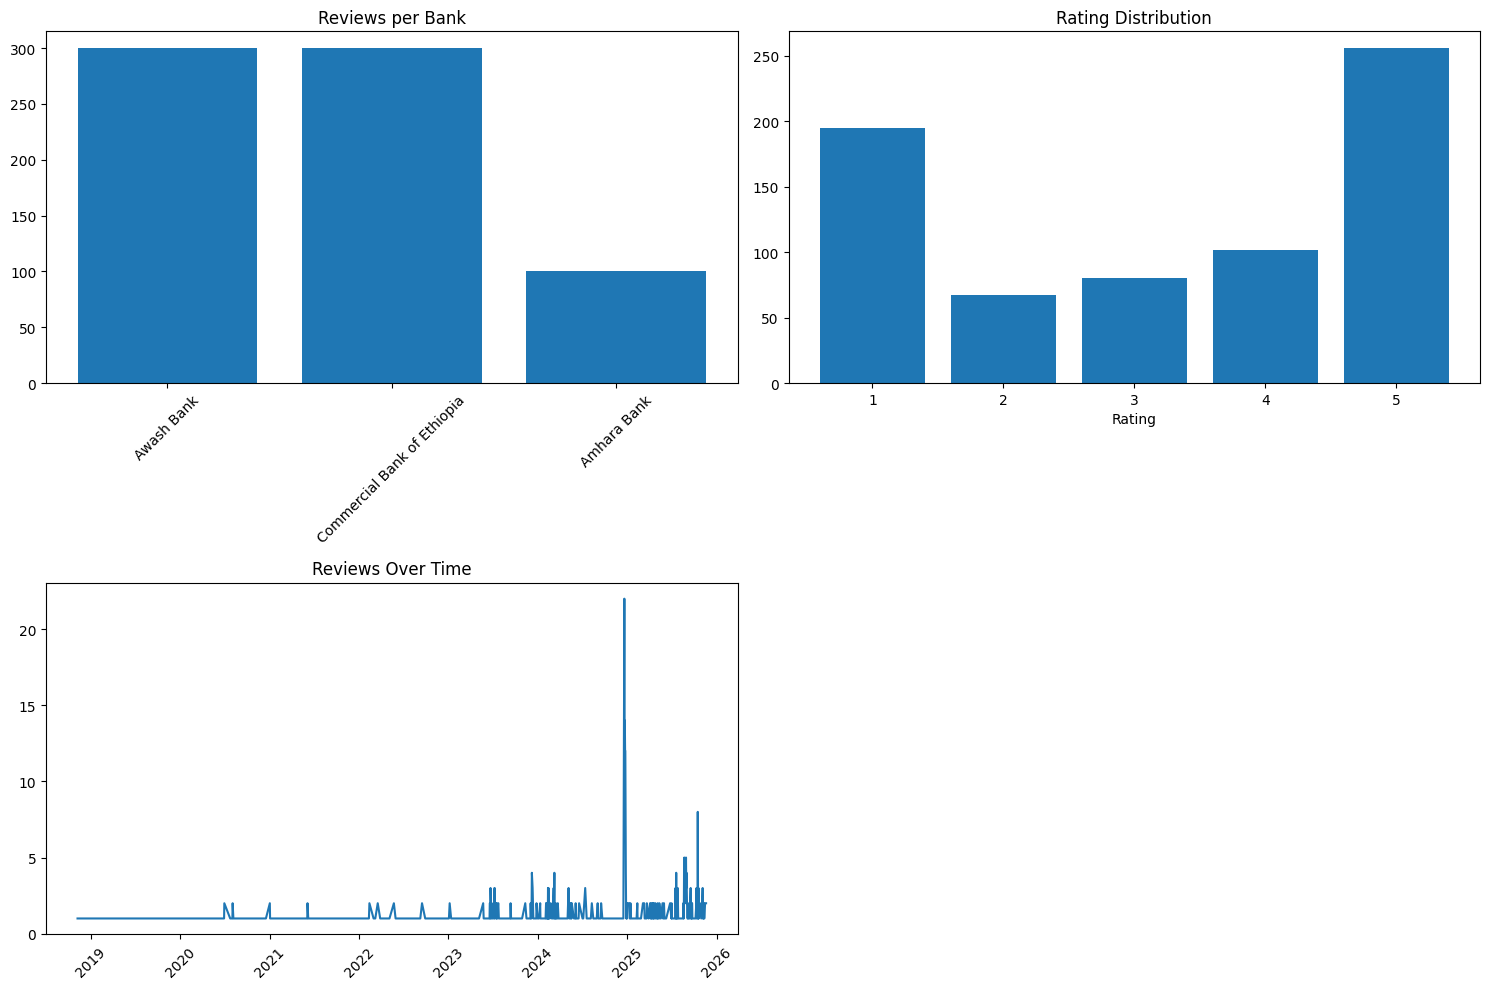

In [6]:
import matplotlib.pyplot as plt

# ✅ Create the figure and axes first
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Optional: check columns
print("Columns:", processed_df.columns.tolist())

# Reviews per bank
reviews_per_bank = processed_df['bank_name'].value_counts()  
axes[0,0].bar(reviews_per_bank.index, reviews_per_bank.values)
axes[0,0].set_title('Reviews per Bank')
axes[0,0].tick_params(axis='x', rotation=45)

# Rating distribution
rating_dist = processed_df['rating'].value_counts().sort_index()
axes[0,1].bar(rating_dist.index, rating_dist.values)
axes[0,1].set_title('Rating Distribution')
axes[0,1].set_xlabel('Rating')

# Date distribution
processed_df['review_date'] = pd.to_datetime(processed_df['review_date'])
date_counts = processed_df['review_date'].value_counts().sort_index()
axes[1,0].plot(date_counts.index, date_counts.values)
axes[1,0].set_title('Reviews Over Time')
axes[1,0].tick_params(axis='x', rotation=45)

# Hide unused subplot (bottom-right)
axes[1,1].axis('off')

# Finalize and show
plt.tight_layout()
plt.show()

In [7]:
def validate_data_quality(df):
    """
    Check if data meets project requirements:
    - At least 1200 reviews
    - Critical fields (review_text, rating, bank_name) have no missing values
    """
    if df is None or df.empty:
        return False
    
    total_reviews = len(df)
    if total_reviews < 1200:
        return False
    
    # Check for missing critical fields
    critical_missing = (
        df['review_text'].isnull().any() or
        df['rating'].isnull().any() or
        df['bank_name'].isnull().any()
    )
    
    return not critical_missing

In [8]:

print(f"Total reviews: {len(processed_df)}")
print(f"Data quality meets requirements: {validate_data_quality(processed_df)}")

Total reviews: 700
Data quality meets requirements: False
